In [1]:
import ROOT as root
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import matplotlib as mpl

Welcome to JupyROOT 6.16/00


In [38]:
#file_1 = '/mnt_data/Terzina_sim/3V_4.6e+07_Hz_0_AC_Compenstion_Off.root'
#file_2 = '/mnt_data/Terzina_sim/3V_4.60001e+07_Hz_0_AC_Compenstion_Off.root'

#file_1 = '/home/andrii/work/DoAna/DoCalcNSB/v8_Terzina/no_baseline/2.8V_4.6001e+07_Hz_0_AC_Compenstion_Off.root'
#file_2 = '/home/andrii/work/DoAna/DoCalcNSB/v8_Terzina/no_baseline/2.8V_4.60001e+07_Hz_0_AC_Compenstion_Off.root'


file_1 = '/mnt_data/Terzina_sim/3V_4.6e+07_Hz_0_AC_Compenstion_Off.root'
file_2 = '/mnt_data/Terzina_sim/3V_4.6001e+07_Hz_0_AC_Compenstion_Off.root'

In [39]:
def get_waveforms(file, n_start, n_length, baseline):

    n_points = 0
    increment = 0
    
    amplitude = []
    amplitude_max_dc = []
    amplitude_max_ac = []
    
    amplitude_arg_max = []
    amplitude_max_ac = []
    amplitude_max = []
    baseline = []
    pulse_amplitude = []
    
    if file.find('.root') != -1:
        f = root.TFile(file)
        myTree = f.Get("T")
        
        for entry_num in range (0 , myTree.GetEntries ()):
            myTree.GetEntry(entry_num)
            
            if entry_num == 0:
                increment = myTree.dt
                n_points = myTree.NPoints
                v_bias = myTree.Vbias
        
            amplitude.append(-1.* np.array(list(myTree.V1)[n_start:n_start + n_length]))
            
            if entry_num == 0:
                print(len(amplitude[0]))
                
            #amplitude_arg_max.append( np.argmin(amplitude[entry_num] ) )
            amplitude_max_dc.append( np.max( amplitude[entry_num] ) )
            amplitude_max_ac.append( np.max( amplitude[entry_num] ) - np.mean( amplitude[entry_num] ) )
        
    else:
        print('incorrect file')
        
    return np.array(amplitude_max_dc), np.array(amplitude_max_ac)

In [40]:
n_dc_single_1, n_ac_single_1 = get_waveforms(file_1, 20, 20, 10)
n_dc_single_2, n_ac_single_2, = get_waveforms(file_1, 20, 20, 10)

20
20


In [13]:
n_dc_single_1, n_ac_single_1, = get_waveforms(file_1, 20, 20, 10)
n_dc_single_2, n_ac_single_2, = get_waveforms(file_1, 40, 20, 10)
n_dc_single_3, n_ac_single_3, = get_waveforms(file_1, 60, 20, 10)
#n_dc_single_4, n_ac_single_4, = get_waveforms(file_1, 80, 20, 10)
#n_dc_single_5, n_ac_single_5, = get_waveforms(file_1, 100, 20, 10)
#n_dc_single_6, n_ac_single_6, = get_waveforms(file_1, 120, 20, 10)
#n_dc_single_7, n_ac_single_7, = get_waveforms(file_1, 140, 20, 10)

n_dc_single_8, n_ac_single_8, = get_waveforms(file_2, 20, 20, 10)
n_dc_single_9, n_ac_single_9, = get_waveforms(file_2, 40, 20, 10)
n_dc_single_10, n_ac_single_10, = get_waveforms(file_2, 60, 20, 10)
#n_dc_single_11, n_ac_single_11, = get_waveforms(file_2, 80, 20, 10)
#n_dc_single_12, n_ac_single_12, = get_waveforms(file_2, 100, 20, 10)
#n_dc_single_13, n_ac_single_13, = get_waveforms(file_2, 120, 20, 10)
#n_dc_single_14, n_ac_single_14, = get_waveforms(file_2, 140, 20, 10)

20
20
20
20
20
20


In [14]:
dc_data = np.array(list(n_dc_single_1) + list(n_dc_single_2) + list(n_dc_single_3) + list(n_dc_single_8) + list(n_dc_single_9) + list(n_dc_single_10))

ac_data = np.array(list(n_ac_single_1) + list(n_ac_single_2) + list(n_ac_single_3) + list(n_ac_single_8) + list(n_ac_single_9) + list(n_ac_single_10))

In [94]:
dc_data = np.array(list(n_dc_single_1) + list(n_dc_single_2) + list(n_dc_single_3) + list(n_dc_single_4) + list(n_dc_single_5)
                  + list(n_dc_single_6) + list(n_dc_single_7) + list(n_dc_single_8) + list(n_dc_single_9) + list(n_dc_single_10)
                  + list(n_dc_single_11) + list(n_dc_single_12) + list(n_dc_single_13) + list(n_dc_single_14) )

ac_data = np.array(list(n_ac_single_1) + list(n_ac_single_2) + list(n_ac_single_3) + list(n_ac_single_4) + list(n_ac_single_5) 
                  + list(n_ac_single_6) + list(n_ac_single_7) + list(n_ac_single_8) + list(n_ac_single_9) + list(n_ac_single_10)
                  + list(n_ac_single_11) + list(n_ac_single_12) + list(n_ac_single_13) + list(n_ac_single_14) )

In [15]:
len(dc_data)

1200000

In [82]:
dc_data_cor = dc_data - 10

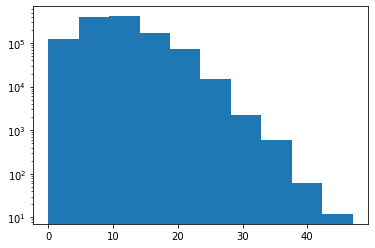

In [16]:
plt.hist(dc_data)
plt.yscale('log')

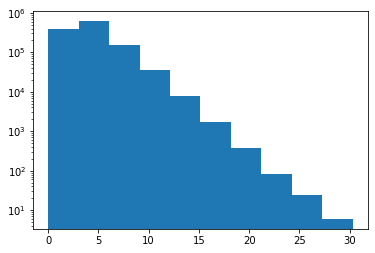

In [17]:
plt.hist(ac_data)
plt.yscale('log')

In [19]:
thresholds = np.arange(0.1, 40., 0.2)

n_events_dc = []
n_events_ac = []

for i_th in thresholds:

    
    n_events_dc.append( len(dc_data[dc_data>i_th]) )
    n_events_ac.append( len(ac_data[ac_data>i_th]) )
    

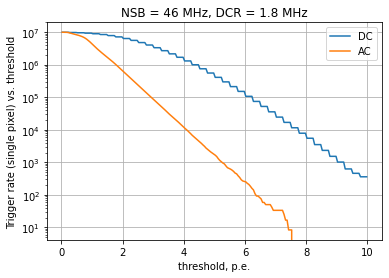

In [37]:
plt.plot(thresholds/4, np.array(n_events_dc)/(read_out_window*len(dc_data)), label='DC')
plt.plot(thresholds/4, np.array(n_events_ac)/(read_out_window*len(ac_data)), label='AC')
plt.grid()
plt.yscale('log')
plt.title('NSB = 46 MHz, DCR = 1.8 MHz')
plt.ylabel('Trigger rate (single pixel) vs. threshold')
plt.xlabel('threshold, p.e.')
plt.legend()

No handles with labels found to put in legend.


(10.0, 100000000.0)

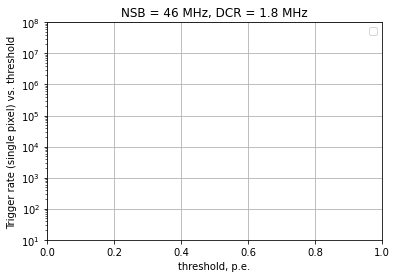

In [25]:
read_out_window = 100e-9
n_pixels = 640
n_pe = 5

#plt.plot(thresholds/n_pe, np.array(n_events_1_dc)/(len(amplitude_max_1_dc)*read_out_window), label='DC' )
#plt.plot(thresholds/n_pe, np.array(n_events_1_ac)/(len(amplitude_max_1_ac)*read_out_window), label='AC')

plt.grid()
plt.yscale('log')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz')
plt.ylabel('Trigger rate (single pixel) vs. threshold')
plt.xlabel('threshold, p.e.')
plt.legend()
plt.ylim(10.0, 10e7)

In [20]:
read_out_window = 100e-9
n_pixels = 640
n_pe = 5

x = np.arange(1, 12, 0.2)
x_data = thresholds/n_pe

x_data_dc = x_data[x_data<6]
y_data_dc_v2 = y_data_dc[x_data<6]

y_data_ac = n_pixels*np.array(n_events_ac)/(len(n_ac_single)*read_out_window)
y_data_dc = n_pixels*np.array(n_events_dc)/(len(n_dc_single)*read_out_window)

x_fit = x_data[x_data>1.4]
y_fit_data_ac_coinsidence = y_data_ac_100ns[x_data>1.4]
popt_ac, pcov_ac = curve_fit(func, x_fit, y_fit_data_ac_coinsidence)
plt.plot(x, func(x, *popt_ac), 'r--')

x_fit_data_dc_coinsidence = x_data[x_data>2]
y_fit_data_dc_coinsidence = y_data_dc_100ns[x_data>2]
popt_dc, pcov_dc = curve_fit(func, x_fit_data_dc_coinsidence, y_fit_data_dc_coinsidence)
plt.plot(x, func(x, *popt_dc), '--', c = 'tab:orange')

x_fit_single_ac = x_data[x_data>4]
y_fit_single_ac = y_data_ac[x_data>4]
popt_ac_single, pcov_ac_single = curve_fit(func, x_fit_single_ac, y_fit_single_ac, maxfev=10000)
plt.plot(x, func(x, *popt_ac_single), 'g--')

x_fit_single_dc = x_data_dc[x_data_dc>4]
y_fit_single_dc = y_data_dc_v2[x_data_dc>4]
popt_dc_single, pcov_dc_single = curve_fit(func, x_fit_single_dc, y_fit_single_dc, popt_ac_single, maxfev=200000)
plt.plot(x, func(x, *popt_dc_single), c = 'tab:blue', linestyle = '--')
#plt.plot(x_fit_single_dc, y_fit_single_dc, '-')

plt.plot(x_data_dc, y_data_dc_v2,'.', c = 'tab:blue', label='Single: DC')
plt.plot(x_data, y_data_dc_100ns,'.', c = 'tab:orange', label='Coincidence: DC')
plt.plot(x_data, y_data_ac, 'g.', label='Single: AC')
plt.plot(x_data, y_data_ac_100ns,'r.', label='Coincidence: AC')

plt.grid()
plt.yscale('log')
plt.ylim(100.0, 10e8)
#plt.xlim(0, 4)
plt.legend()

plt.title('NSB = 46 MHz, DCR = 1.8 MHz')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

#plt.savefig('rate_all_pixel_coinsidence_6x6_75.png', dpi = 200)

NameError: name 'y_data_dc' is not defined

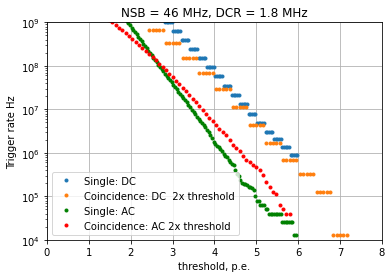

In [187]:
read_out_window = 100e-9
n_pixels = 640
n_pe = 5

plt.plot(x_data_dc, y_data_dc_v2,'.', c = 'tab:blue', label='Single: DC')
plt.plot(2.*x_data, y_data_dc_100ns,'.', c = 'tab:orange', label='Coincidence: DC  2x threshold')
plt.plot(x_data, y_data_ac, 'g.', label='Single: AC')
plt.plot(2.*x_data, y_data_ac_100ns,'r.', label='Coincidence: AC 2x threshold')

plt.grid()
plt.yscale('log')
plt.ylim(10000.0, 10e8)
plt.xlim(0, 8)
plt.legend()

plt.title('NSB = 46 MHz, DCR = 1.8 MHz')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

plt.savefig('rate_all_pixel_coinsidence_6x6_75_2x_threshold.png', dpi = 200)

x_data_dc = x_data[x_data<7],
y_data_dc_v2 = y_data_dc[x_data<7]

In [147]:
len(x_data_dc[0])

175

In [148]:
len(y_data_dc_v2)

175

In [ ]:
x_fit = x_data[x_data>1.4]
y_fit_data_ac_coinsidence = y_data_ac_coinsidence[x_data>1.4]

x_fit_data_dc_coinsidence = x_data[x_data>5]
y_fit_data_dc_coinsidence = y_data_dc_coinsidence[x_data>5]

x_fit_single_ac = x_data[x_data>4]
y_fit_single_ac = y_data_ac[x_data>4]

x_fit_single_dc = x_data[x_data>6]
y_fit_single_dc = y_data_dc[x_data>6]

x = np.arange(1, 12, 0.2)

plt.plot(x_data, y_data_dc,'.', c = 'tab:blue', label='Single: DC')
plt.plot(x_data, y_data_dc_coinsidence,'.', c = 'tab:orange', label='Coincidence: DC')
plt.plot(x_data, y_data_ac, 'g.', label='Single: AC')
plt.plot(x_data, y_data_ac_coinsidence,'r.', label='Coincidence: AC')

popt_ac, pcov_ac = curve_fit(func, x_fit, y_fit_data_ac_coinsidence)
popt_dc, pcov_dc = curve_fit(func, x_fit_data_dc_coinsidence, y_fit_data_dc_coinsidence)

popt_ac_single, pcov_ac_single = curve_fit(func, x_fit_single_ac, y_fit_single_ac, maxfev=10000)
popt_dc_single, pcov_dc_single = curve_fit(func, x_fit_single_dc, y_fit_single_dc, maxfev=20000)

plt.plot(x, func(x, *popt_ac), 'r--')
plt.plot(x, func(x, *popt_ac_single), 'g--')
plt.plot(x[x>6], func(x[x>6], *popt_dc_single), c = 'tab:blue', linestyle = '--')
plt.plot(x, func(x, *popt_dc), c = 'tab:orange')
#plt.plot(x_fit_single_ac, y_fit_data_ac, 'b--')

In [100]:
def get_waveforms_smart(file1, file2, range_points, baseline):

    n_skip = 20
    n_points = 0
    increment = 0
    amplitude = []
    window = 20
    amplitude_cross = []
    amplitude_cross_ac = []
    
    n_triggers = 0
    
    
    amplitude_arg_max = []
    amplitude_max_ac = []
    amplitude_max = []
    baseline = []
    pulse_amplitude = []
    
    if file1.find('.root') != -1:
        f1 = root.TFile(file1)
        myTree1 = f1.Get("T")
        
        f2 = root.TFile(file2)
        myTree2 = f2.Get("T")
        
        for entry_num in range (0 , myTree1.GetEntries ()):
        #for entry_num in range (0 , 1000):
            myTree1.GetEntry(entry_num)
            myTree2.GetEntry(entry_num)
            
            if entry_num == 0:
                increment = myTree1.dt
                n_points = myTree1.NPoints
                v1_bias = myTree1.Vbias
                
            length = len(list(myTree1.V1)[n_skip:])
            n_intervals = int(length/range_points)
            
            if entry_num == 0:
                print('length : ', length)
                print('n intervals : ', n_intervals)
                
            for interval in range(n_intervals):
                p_start = n_skip + interval*range_points
                
                if entry_num == 0:
                    print('start : ', p_start)
                    print('end   : ', p_start+range_points)
                
                amplitude_1 = -1.* np.array(list(myTree1.V1)[p_start:p_start+range_points])
                amplitude_1_baseline = np.mean(-1.* np.array(list(myTree1.V1)[p_start:p_start+range_points]))
            
                amplitude_2 = -1.* np.array(list(myTree2.V1)[p_start:p_start+range_points])
                amplitude_2_baseline = np.mean(-1.* np.array(list(myTree2.V1)[p_start:p_start+range_points]))
            
                amplitude_cross_1 = np.max(amplitude_1) - baseline
                amplitude_cross_2 = np.max(amplitude_2) - baseline
            
                amplitude_cross_1_ac = np.max(amplitude_1) - amplitude_1_baseline
                amplitude_cross_2_ac = np.max(amplitude_2) - amplitude_2_baseline
            
                amplitude_cross.append(min(amplitude_cross_1, amplitude_cross_2))
                amplitude_cross_ac.append(min(amplitude_cross_1_ac, amplitude_cross_2_ac))
                
                n_triggers = n_triggers + 1
            
            '''
            for i_time in range(len(amplitude_1)):
                amplitude_cross_1 = np.max(amplitude_1[i_time:i_time+window])
                amplitude_cross_2 = np.max(amplitude_2[i_time:i_time+window])
                
                amplitude_cross.append(min(amplitude_cross_1, amplitude_cross_2))
            '''
            
        
    else:
        print('incorrect file')
        
    return np.array(amplitude_cross), np.array(amplitude_cross_ac), n_triggers

In [11]:

f1 = root.TFile(file_1)
f2 = root.TFile(file_2)

myTree1 = f1.Get("T")
myTree2 = f2.Get("T")

amplitude1 = []
amplitude2 = []
    
#for entry_num in range (0 , myTree1.GetEntries ()):
for entry_num in range (0 , 100):
    myTree1.GetEntry(entry_num)
    myTree2.GetEntry(entry_num)
            
    if entry_num == 0:
        increment = myTree1.dt
        n_points = myTree1.NPoints
        v_bias = myTree1.Vbias
        
    amplitude1.append(-1.* np.array(list(myTree1.V1)))
    amplitude2.append(-1.* np.array(list(myTree2.V1)))

In [41]:
def get_waveforms_smart(file1, file2, range_points):

    n_points = 0
    increment = 0
    amplitude = []
    window = 20
    amplitude_cross = []
    amplitude_cross_ac = []
    
    n_intervals = 0
    
    
    amplitude_arg_max = []
    amplitude_max_ac = []
    amplitude_max = []
    baseline = []
    pulse_amplitude = []
    
    if file1.find('.root') != -1:
        f1 = root.TFile(file1)
        myTree1 = f1.Get("T")
        
        f2 = root.TFile(file2)
        myTree2 = f2.Get("T")
        
        for entry_num in range (0 , myTree1.GetEntries ()):
        #for entry_num in range (0 , 1000):
            myTree1.GetEntry(entry_num)
            myTree2.GetEntry(entry_num)
            
            if entry_num == 0:
                increment = myTree1.dt
                n_points = myTree1.NPoints
                v1_bias = myTree1.Vbias
                
            
            amplitude_1 = -1.* np.array(list(myTree1.V1)[20:20+range_points])
            amplitude_1_baseline = np.mean(-1.* np.array(list(myTree1.V1)[20:]))
            amplitude_2 = -1.* np.array(list(myTree2.V1)[20:20+range_points])
            amplitude_2_baseline = np.mean(-1.* np.array(list(myTree2.V1)[20:]))
            
            
            amplitude_cross_1 = np.max(amplitude_1)
            amplitude_cross_2 = np.max(amplitude_2)
            
            amplitude_cross_1_ac = np.max(amplitude_1) - amplitude_1_baseline
            amplitude_cross_2_ac = np.max(amplitude_2) - amplitude_2_baseline
            
            amplitude_cross.append(min(amplitude_cross_1, amplitude_cross_2))
            amplitude_cross_ac.append(min(amplitude_cross_1_ac, amplitude_cross_2_ac))
            
            '''
            for i_time in range(len(amplitude_1)):
                amplitude_cross_1 = np.max(amplitude_1[i_time:i_time+window])
                amplitude_cross_2 = np.max(amplitude_2[i_time:i_time+window])
                
                amplitude_cross.append(min(amplitude_cross_1, amplitude_cross_2))
            '''
            
        
    else:
        print('incorrect file')
        
    return np.array(amplitude_cross), np.array(amplitude_cross_ac)

In [102]:

f = root.TFile(file_2)
myTree = f.Get("T")

amplitude = []
    
for entry_num in range (0 , myTree.GetEntries ()):
    myTree.GetEntry(entry_num)
            
    if entry_num == 0:
        increment = myTree.dt
        n_points = myTree.NPoints
        v_bias = myTree.Vbias
        
    amplitude.append(-1.* np.array(list(myTree.V1)))

KeyboardInterrupt: 

In [103]:
n_points

160

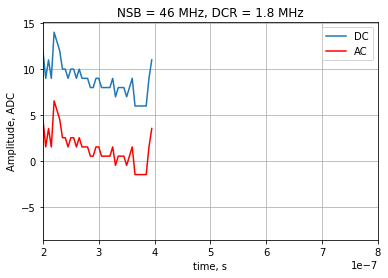

In [12]:
x_time = np.arange(0, n_points*increment, increment)
event = 3

plt.plot(x_time, amplitude1[event], label='DC')
plt.xlim(0.2e-6, 0.8e-6)
plt.plot(x_time, amplitude1[event] - np.mean(amplitude1[event]), 'r', label='AC')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz')
plt.ylabel('Amplitude, ADC')
plt.xlabel('time, s')

plt.grid()
plt.legend()
plt.savefig('waveforms_ac_dc.png', dpi = 200)

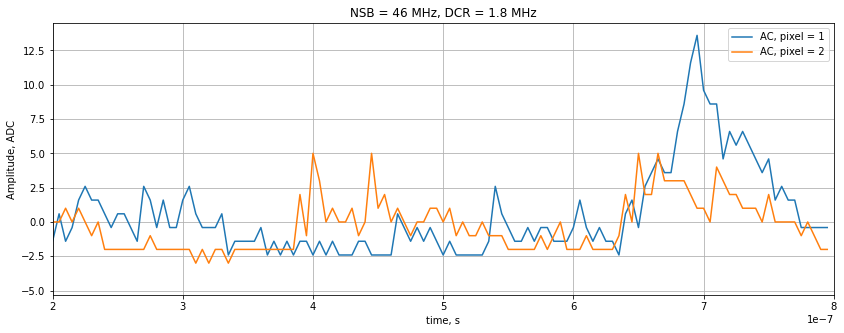

In [105]:
plt.figure(figsize=(14,5))

x_time = np.arange(0, n_points*increment, increment)
event = 3

plt.plot(x_time, amplitude1[event] - np.mean(amplitude1[event]), label='AC, pixel = 1')
plt.xlim(0.2e-6, 0.8e-6)
plt.plot(x_time, amplitude2[event] - np.mean(amplitude2[event]), label='AC, pixel = 2')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz')
plt.ylabel('Amplitude, ADC')
plt.xlabel('time, s')

plt.grid()
plt.legend()
plt.savefig('waveforms_ac_2pixls.png', dpi = 200)

In [111]:
data_cross_dc_50ns, data_cross_ac_50ns = get_waveforms_smart(file_1, file_2, 10)

In [112]:
len(data_cross_ac_50ns)

500000

In [68]:
n_intervals_100ns

600000

In [113]:
data_cross_dc_25ns, data_cross_ac_25ns = get_waveforms_smart(file_1, file_2, 5)

In [114]:
data_cross_dc_10ns, data_cross_ac_10ns = get_waveforms_smart(file_1, file_2, 2)

In [115]:
data_cross_dc_100ns, data_cross_ac_100ns = get_waveforms_smart(file_1, file_2, 20)

In [116]:
thresholds = np.arange(0.1, 40., 0.2)


n_events_2pixels_all_dc_100ns = []
n_events_2pixels_all_ac_100ns = []

n_events_2pixels_all_dc_50ns = []
n_events_2pixels_all_ac_50ns = []

n_events_2pixels_all_dc_25ns = []
n_events_2pixels_all_ac_25ns = []

n_events_2pixels_all_dc_10ns = []
n_events_2pixels_all_ac_10ns = []

for i_th in thresholds:
    #print(i_th)
    
    n_events_2pixels_all_dc_100ns.append( len(data_cross_dc_100ns[data_cross_dc_100ns>i_th]) )
    n_events_2pixels_all_ac_100ns.append( len(data_cross_ac_100ns[data_cross_ac_100ns>i_th]) )
    
    n_events_2pixels_all_dc_50ns.append( len(data_cross_dc_50ns[data_cross_dc_50ns>i_th]) )
    n_events_2pixels_all_ac_50ns.append( len(data_cross_ac_50ns[data_cross_ac_50ns>i_th]) )
    
    n_events_2pixels_all_dc_25ns.append( len(data_cross_dc_25ns[data_cross_dc_25ns>i_th]) )
    n_events_2pixels_all_ac_25ns.append( len(data_cross_ac_25ns[data_cross_ac_25ns>i_th]) )
    
    n_events_2pixels_all_dc_10ns.append( len(data_cross_dc_10ns[data_cross_dc_10ns>i_th]) )
    n_events_2pixels_all_ac_10ns.append( len(data_cross_ac_10ns[data_cross_ac_10ns>i_th]) )

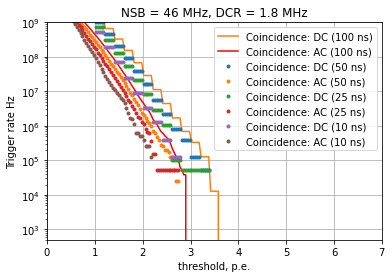

In [190]:
read_out_window_100ns = 100e-9
read_out_window_50ns = 50e-9
read_out_window_25ns = 25e-9
read_out_window_10ns = 10e-9
n_pixels = 640

x_data = thresholds/n_pe

y_data_ac_100ns = n_pixels*np.array(n_events_2pixels_all_ac_100ns)/(len(data_cross_ac_100ns)*read_out_window_100ns)
y_data_dc_100ns = n_pixels*np.array(n_events_2pixels_all_dc_100ns)/(len(data_cross_dc_100ns)*read_out_window_100ns)

y_data_ac_50ns = n_pixels*np.array(n_events_2pixels_all_ac_50ns)/(len(data_cross_ac_50ns)*read_out_window_50ns)
y_data_dc_50ns = n_pixels*np.array(n_events_2pixels_all_dc_50ns)/(len(data_cross_dc_50ns)*read_out_window_50ns)

y_data_ac_25ns = n_pixels*np.array(n_events_2pixels_all_ac_25ns)/(len(data_cross_ac_25ns)*read_out_window_25ns)
y_data_dc_25ns = n_pixels*np.array(n_events_2pixels_all_dc_25ns)/(len(data_cross_dc_25ns)*read_out_window_25ns)

y_data_ac_10ns = n_pixels*np.array(n_events_2pixels_all_ac_10ns)/(len(data_cross_ac_10ns)*read_out_window_10ns)
y_data_dc_10ns = n_pixels*np.array(n_events_2pixels_all_dc_10ns)/(len(data_cross_dc_10ns)*read_out_window_10ns)

plt.plot(x_data, y_data_dc_100ns,'-', c = 'tab:orange', label='Coincidence: DC (100 ns)')
plt.plot(x_data, y_data_ac_100ns,'r-', label='Coincidence: AC (100 ns)')

plt.plot(x_data, y_data_dc_50ns,'.', label='Coincidence: DC (50 ns)')
plt.plot(x_data, y_data_ac_50ns,'.', label='Coincidence: AC (50 ns)')

plt.plot(x_data, y_data_dc_25ns,'.', label='Coincidence: DC (25 ns)')
plt.plot(x_data, y_data_ac_25ns,'.', label='Coincidence: AC (25 ns)')

plt.plot(x_data, y_data_dc_10ns,'.', label='Coincidence: DC (10 ns)')
plt.plot(x_data, y_data_ac_10ns,'.', label='Coincidence: AC (10 ns)')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 1e9)
plt.xlim(0, 7)
plt.legend()

plt.title('NSB = 46 MHz, DCR = 1.8 MHz')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

plt.savefig('rate_all_pixel_coinsidence.png', dpi = 200)

In [5]:
data_cross_dc, data_cross_ac = get_waveforms_smart(file_1, file_2)

In [6]:
len(data_cross_dc)

200000

In [7]:
n_pe = 5

amplitude_max_1_dc, amplitude_max_2_dc, amplitude_max_3_dc, amplitude_max_1_ac, amplitude_max_2_ac, amplitude_max_3_ac = get_waveforms(file_1)

#amplitude_max_dc = np.array(amplitude_max_dc)
#amplitude_max_ac = np.array(amplitude_max_ac)

20


In [9]:
min(10, 20)

10

In [8]:
amplitude_max_11_dc, amplitude_max_12_dc, amplitude_max_13_dc, amplitude_max_11_ac, amplitude_max_12_ac, amplitude_max_13_ac = get_waveforms(file_2)

20


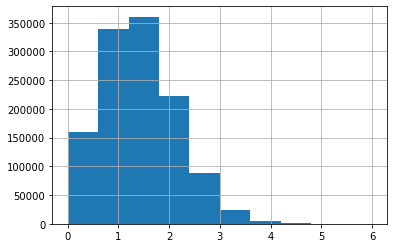

In [27]:
n_pe = 5
plt.hist(data_cross_dc_50ns/n_pe)
#plt.hist(amplitude_max_1_ac/n_pe)
plt.grid()

In [11]:
thresholds = np.arange(0.1, 40., 0.2)

n_events_1_dc = []
n_events_1_ac = []

n_events_dc = []
n_events_ac = []

for i_th in thresholds:
    #print(i_th)
    n_events_1_dc.append( len(amplitude_max_1_dc[amplitude_max_1_dc>i_th]) )
    n_events_1_ac.append( len(amplitude_max_1_ac[amplitude_max_1_ac>i_th]) )
    
    n_events_dc.append( len(amplitude_max_1_dc[amplitude_max_1_dc>i_th]) )
    n_events_dc.append( len(amplitude_max_2_dc[amplitude_max_2_dc>i_th]) )
    n_events_dc.append( len(amplitude_max_3_dc[amplitude_max_3_dc>i_th]) )
    
    n_events_ac.append( len(amplitude_max_1_ac[amplitude_max_1_ac>i_th]) )
    n_events_ac.append( len(amplitude_max_2_ac[amplitude_max_2_ac>i_th]) )
    n_events_ac.append( len(amplitude_max_3_ac[amplitude_max_3_ac>i_th]) )
    

In [12]:
amli_1_dc_all = np.append([amplitude_max_1_dc, amplitude_max_2_dc], amplitude_max_3_dc)
amli_1_ac_all = np.append([amplitude_max_1_ac, amplitude_max_2_ac], amplitude_max_3_ac)

amli_2_dc_all = np.append([amplitude_max_11_dc, amplitude_max_12_dc], amplitude_max_13_dc)
amli_2_ac_all = np.append([amplitude_max_11_ac, amplitude_max_12_ac], amplitude_max_13_ac)

amli_dc_all = np.append(amli_1_dc_all, amli_2_dc_all)
amli_ac_all = np.append(amli_1_ac_all, amli_2_ac_all)

In [13]:
len(amli_dc_all)

1200000

In [28]:
thresholds = np.arange(0.1, 40., 0.2)

n_events_all_dc = []
n_events_all_ac = []

n_events_2pixels_all_dc = []
n_events_2pixels_all_ac = []

n_events_2pixels_all_dc_50ns = []
n_events_2pixels_all_ac_50ns = []

n_events_2pixels_all_dc_25ns = []
n_events_2pixels_all_ac_25ns = []

n_events_2pixels_all_dc_10ns = []
n_events_2pixels_all_ac_10ns = []

for i_th in thresholds:
    #print(i_th)
    n_events_all_dc.append( len(amli_dc_all[amli_dc_all>i_th]) )
    n_events_all_ac.append( len(amli_ac_all[amli_ac_all>i_th]) )
    
    n_events_2pixels_all_dc.append( len(data_cross_dc[data_cross_dc>i_th]) )
    n_events_2pixels_all_ac.append( len(data_cross_ac[data_cross_ac>i_th]) )
    
    n_events_2pixels_all_dc_50ns.append( len(data_cross_dc_50ns[data_cross_dc_50ns>i_th]) )
    n_events_2pixels_all_ac_50ns.append( len(data_cross_ac_50ns[data_cross_ac_50ns>i_th]) )
    
    n_events_2pixels_all_dc_25ns.append( len(data_cross_dc_25ns[data_cross_dc_25ns>i_th]) )
    n_events_2pixels_all_ac_25ns.append( len(data_cross_ac_25ns[data_cross_ac_25ns>i_th]) )
    
    n_events_2pixels_all_dc_10ns.append( len(data_cross_dc_10ns[data_cross_dc_10ns>i_th]) )
    n_events_2pixels_all_ac_10ns.append( len(data_cross_ac_10ns[data_cross_ac_10ns>i_th]) )

In [123]:
def func(x, a, b, c):
    return a * np.exp(-b*x)

In [21]:
read_out_window = 100e-9
n_pixels = 640

x_data = thresholds/n_pe

y_data_ac = n_pixels*np.array(n_events_all_ac)/(len(amli_ac_all)*read_out_window)
y_data_dc = n_pixels*np.array(n_events_all_dc)/(len(amli_dc_all)*read_out_window)

y_data_dc_coinsidence = n_pixels*np.array(n_events_2pixels_all_dc)/(len(data_cross_dc)*read_out_window)
y_data_ac_coinsidence = n_pixels*np.array(n_events_2pixels_all_ac)/(len(data_cross_ac)*read_out_window)

y_data_dc_coinsidence_50ns = n_pixels*np.array(n_events_2pixels_all_dc_50ns)/(len(data_cross_dc_50ns)*50.e-9)
y_data_ac_coinsidence_50ns = n_pixels*np.array(n_events_2pixels_all_ac_50ns)/(len(data_cross_ac_50ns)*50.e-9)

y_data_dc_coinsidence_25ns = n_pixels*np.array(n_events_2pixels_all_dc_25ns)/(len(data_cross_dc_25ns)*25.e-9)
y_data_ac_coinsidence_25ns = n_pixels*np.array(n_events_2pixels_all_ac_25ns)/(len(data_cross_ac_25ns)*25.e-9)

y_data_dc_coinsidence_10ns = n_pixels*np.array(n_events_2pixels_all_dc_10ns)/(len(data_cross_dc_10ns)*10.e-9)
y_data_ac_coinsidence_10ns = n_pixels*np.array(n_events_2pixels_all_ac_10ns)/(len(data_cross_ac_10ns)*10.e-9)

x_fit = x_data[x_data>1.4]
y_fit_data_ac_coinsidence = y_data_ac_coinsidence[x_data>1.4]

x_fit_data_dc_coinsidence = x_data[x_data>5]
y_fit_data_dc_coinsidence = y_data_dc_coinsidence[x_data>5]

x_fit_single_ac = x_data[x_data>4]
y_fit_single_ac = y_data_ac[x_data>4]

x_fit_single_dc = x_data[x_data>6]
y_fit_single_dc = y_data_dc[x_data>6]

x = np.arange(1, 12, 0.2)

plt.plot(x_data, y_data_dc,'.', c = 'tab:blue', label='Single: DC')
plt.plot(x_data, y_data_dc_coinsidence,'.', c = 'tab:orange', label='Coincidence: DC')
plt.plot(x_data, y_data_ac, 'g.', label='Single: AC')
plt.plot(x_data, y_data_ac_coinsidence,'r.', label='Coincidence: AC')

popt_ac, pcov_ac = curve_fit(func, x_fit, y_fit_data_ac_coinsidence)
popt_dc, pcov_dc = curve_fit(func, x_fit_data_dc_coinsidence, y_fit_data_dc_coinsidence)

popt_ac_single, pcov_ac_single = curve_fit(func, x_fit_single_ac, y_fit_single_ac, maxfev=10000)
popt_dc_single, pcov_dc_single = curve_fit(func, x_fit_single_dc, y_fit_single_dc, maxfev=20000)

plt.plot(x, func(x, *popt_ac), 'r--')
plt.plot(x, func(x, *popt_ac_single), 'g--')
plt.plot(x[x>6], func(x[x>6], *popt_dc_single), c = 'tab:blue', linestyle = '--')
plt.plot(x, func(x, *popt_dc), c = 'tab:orange')
#plt.plot(x_fit_single_ac, y_fit_data_ac, 'b--')


#plt.plot(2*x_data, y_data_ac_coinsidence,'--', label='Coincidence: AC, 2x threshold')
#plt.plot(2*x_data, y_data_dc_coinsidence,'--', label='Coincidence: DC, 2x threshold')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 10e8)
#plt.xlim(0, 4)
plt.legend()

plt.title('NSB = 46 MHz, DCR = 1.8 MHz')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

plt.savefig('rate_all_pixel.png', dpi = 200)

NameError: name 'n_events_all_ac' is not defined

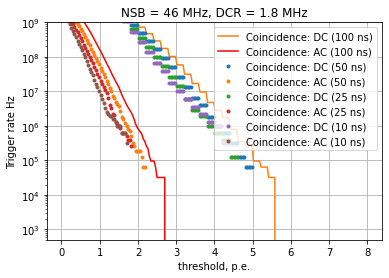

In [45]:
plt.plot(x_data, y_data_dc_coinsidence,'-', c = 'tab:orange', label='Coincidence: DC (100 ns)')
plt.plot(x_data, y_data_ac_coinsidence,'r-', label='Coincidence: AC (100 ns)')

plt.plot(x_data, y_data_dc_coinsidence_50ns,'.', label='Coincidence: DC (50 ns)')
plt.plot(x_data, y_data_ac_coinsidence_50ns,'.', label='Coincidence: AC (50 ns)')

plt.plot(x_data, y_data_dc_coinsidence_25ns,'.', label='Coincidence: DC (25 ns)')
plt.plot(x_data, y_data_ac_coinsidence_25ns,'.', label='Coincidence: AC (25 ns)')

plt.plot(x_data, y_data_dc_coinsidence_10ns,'.', label='Coincidence: DC (10 ns)')
plt.plot(x_data, y_data_ac_coinsidence_10ns,'.', label='Coincidence: AC (10 ns)')

plt.grid()
plt.yscale('log')
plt.ylim(500.0, 10e8)
#plt.xlim(0, 4)
plt.legend()

plt.title('NSB = 46 MHz, DCR = 1.8 MHz')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')
plt.savefig('test_coinsidence.png', dpi = 200)

In [17]:
plt.plot(x_fit_single_ac, y_fit_data_ac, 'b--')
plt.yscale('log')

NameError: name 'y_fit_data_ac' is not defined

In [214]:
1000*24*60*60*20*12/1.e9

20.736

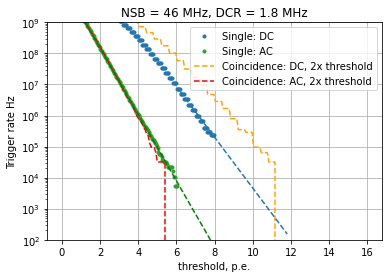

In [18]:
plt.plot(x_data, y_data_dc, '.', c = 'tab:blue', label='Single: DC')
plt.plot(x_data, y_data_ac, '.', c = 'tab:green', label='Single: AC')

plt.plot(2.*x_data, y_data_dc_coinsidence,'--', c = 'orange', label='Coincidence: DC, 2x threshold')
plt.plot(2.*x_data, y_data_ac_coinsidence,'--', c = 'r', label='Coincidence: AC, 2x threshold')

plt.plot(x, func(x, *popt_ac_single), 'g--')
plt.plot(x[x>6], func(x[x>6], *popt_dc_single), c = 'tab:blue', linestyle = '--')

plt.grid()
plt.yscale('log')
plt.ylim(100.0, 10e8)
#plt.xlim(0, 4)
plt.legend()

plt.title('NSB = 46 MHz, DCR = 1.8 MHz')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

plt.savefig('rate_all_pixel_2x.png', dpi = 200)

In [22]:
plt.plot(x_data, y_data_ac,'.-', label='Single: AC')
plt.plot(x_data, y_data_ac_coinsidence,'.-', label='Coincidence: AC')
plt.plot(2*x_data, y_data_ac_coinsidence,'--', label='Coincidence: AC, 2x threshold')

plt.grid()
plt.yscale('log')
#plt.ylim(1.e5, 2.e7)
#plt.xlim(0, 6)
plt.legend()

plt.title('NSB = 46 MHz, DCR = 1.8 MHz')
plt.ylabel('Trigger rate Hz')
plt.xlabel('threshold, p.e.')

NameError: name 'y_data_ac' is not defined

In [65]:
x_data[x_data>1]

array([1.02, 1.06, 1.1 , 1.14, 1.18, 1.22, 1.26, 1.3 , 1.34, 1.38, 1.42,
       1.46, 1.5 , 1.54, 1.58, 1.62, 1.66, 1.7 , 1.74, 1.78, 1.82, 1.86,
       1.9 , 1.94, 1.98, 2.02, 2.06, 2.1 , 2.14, 2.18, 2.22, 2.26, 2.3 ,
       2.34, 2.38, 2.42, 2.46, 2.5 , 2.54, 2.58, 2.62, 2.66, 2.7 , 2.74,
       2.78, 2.82, 2.86, 2.9 , 2.94, 2.98, 3.02, 3.06, 3.1 , 3.14, 3.18,
       3.22, 3.26, 3.3 , 3.34, 3.38, 3.42, 3.46, 3.5 , 3.54, 3.58, 3.62,
       3.66, 3.7 , 3.74, 3.78, 3.82, 3.86, 3.9 , 3.94, 3.98, 4.02, 4.06,
       4.1 , 4.14, 4.18, 4.22, 4.26, 4.3 , 4.34, 4.38, 4.42, 4.46, 4.5 ,
       4.54, 4.58, 4.62, 4.66, 4.7 , 4.74, 4.78, 4.82, 4.86, 4.9 , 4.94,
       4.98, 5.02, 5.06, 5.1 , 5.14, 5.18, 5.22, 5.26, 5.3 , 5.34, 5.38,
       5.42, 5.46, 5.5 , 5.54, 5.58, 5.62, 5.66, 5.7 , 5.74, 5.78, 5.82,
       5.86, 5.9 , 5.94, 5.98, 6.02, 6.06, 6.1 , 6.14, 6.18, 6.22, 6.26,
       6.3 , 6.34, 6.38, 6.42, 6.46, 6.5 , 6.54, 6.58, 6.62, 6.66, 6.7 ,
       6.74, 6.78, 6.82, 6.86, 6.9 , 6.94, 6.98, 7.

/home/andrii/anaconda3/envs/cta-cnn/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


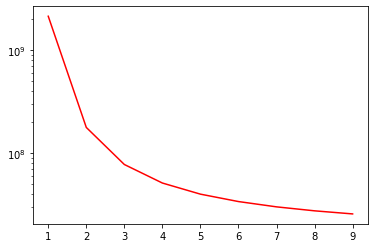

In [73]:
plt.plot(x_fit, func(x_fit, *popt), 'r-', label="Fitted Curve")
plt.yscale('log')

In [23]:
plt.plot(thresholds/n_pe, np.array(n_events_1_dc)/len(amplitude_max_1_dc), label='DC')
plt.plot(thresholds/n_pe, np.array(n_events_1_ac)/len(amplitude_max_1_ac), label='AC')

plt.grid()
plt.yscale('log')

plt.ylabel('Probability')
plt.title('probability vs. threshold')
plt.xlabel('threshold, p.e.')
plt.legend()

NameError: name 'n_events_1_dc' is not defined

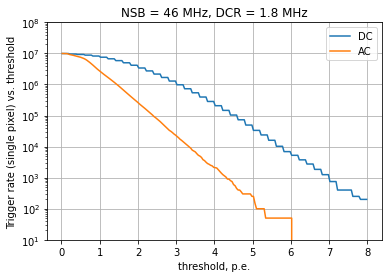

In [21]:
read_out_window = 100e-9
n_pixels = 640

plt.plot(thresholds/n_pe, np.array(n_events_1_dc)/(len(amplitude_max_1_dc)*read_out_window), label='DC' )
plt.plot(thresholds/n_pe, np.array(n_events_1_ac)/(len(amplitude_max_1_ac)*read_out_window), label='AC')

plt.grid()
plt.yscale('log')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz')
plt.ylabel('Trigger rate (single pixel) vs. threshold')
plt.xlabel('threshold, p.e.')
plt.legend()
plt.ylim(10.0, 10e7)
plt.savefig('rate_single_pixel.png', dpi = 200)

In [22]:
read_out_window = 100e-9
n_pixels = 640

plt.plot(thresholds/n_pe, n_pixels*np.array(n_events_dc)/(len(amplitude_max_dc)*read_out_window), label='DC' )
plt.plot(thresholds/n_pe, n_pixels*np.array(n_events_ac)/(len(amplitude_max_ac)*read_out_window), label='AC')

plt.grid()
plt.yscale('log')

plt.title('NSB = 46 MHz, DCR = 1.8 MHz')
plt.ylabel('Trigger rate (all pixels) vs. threshold')
plt.xlabel('threshold, p.e.')
plt.legend()
plt.ylim(10.e3, 10e10)
plt.savefig('rate_all_pixels.png', dpi = 200)

NameError: name 'amplitude_max_dc' is not defined